In [4]:
#import the requisite libraries. Pandas and matplotlib
#assign the file imdb.title.basics.csv.gz to a variable and read the CSV file in pandas 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('imdb.title.basics.csv.gz')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
# Get an overall view of the title basics file and the number of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
#Checking summation of null values in the title basics file
df.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [7]:
#Check for duplicates in the title basics file
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [8]:
#Work out the mean of runtime_minutes to obtain the values to replace the missing values with
print(df['runtime_minutes'].mean())

86.18724706088021


In [65]:
#Replace the null values in the runtime_minutes column with the mean of runtimes
df['runtime_minutes'] = df['runtime_minutes'].fillna(value = df['runtime_minutes'].mean())
df.isna().sum()

tconst              0
primary_title       1
original_title     22
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [63]:
#Calculate the mean to confirm the value has changed significantly after filling the null values
print(df['runtime_minutes'].mean())

86.18724706088021


In [66]:
#Fill the null values in the genres folder with the mode and confirm if 
df['genres'] = df['genres'].fillna(value = df['genres'].mode()[0])
df.isna().sum()

tconst              0
primary_title       1
original_title     22
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [11]:
#Display and review the cleaned data
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary


In [12]:
#Assign the movie_gross csv document to a variable and display the contents
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [13]:
#Check the number of null values in the movie_gross data
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#Display the details of the movie_gross data and number and data type of the variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
#Check for special characters in the movie_gross data columns. This is to find out why the forein data type is object instead of 
#float or integer
for col in df1.columns:
     print(col, '\n', df1[col].value_counts(normalize=True).head(), '\n\n')

title 
 title
Bluebeard               0.000590
Before We Go            0.000295
Knock Knock             0.000295
Kindergarten Teacher    0.000295
Welcome to Leith        0.000295
Name: proportion, dtype: float64 


studio 
 studio
IFC      0.049083
Uni.     0.043465
WB       0.041396
Fox      0.040213
Magn.    0.040213
Name: proportion, dtype: float64 


domestic_gross 
 domestic_gross
1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: proportion, dtype: float64 


foreign_gross 
 foreign_gross
1200000    0.011291
1100000    0.006873
4200000    0.005891
1900000    0.005891
1300000    0.005400
Name: proportion, dtype: float64 


year 
 year
2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: proportion, dtype: float64 




In [16]:
#Fill the null values in the domestic gross column of the movie_gross data with the the mean
df1['domestic_gross'] = df1['domestic_gross'].fillna(value = df1['domestic_gross'].mean())
df1.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [17]:
# Fill the null values in the foreign gross column with the median of the data
# The error below shows that we have comma character in one number "1,131.6", causing the column to be labelled data type object
# I attempted to replace this character with a blank using the formula below but i failed
#df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '')

df1['foreign_gross'] = df1['foreign_gross'].fillna(value = df1['foreign_gross'].median())
df1.isna().sum()

TypeError: could not convert string to float: '1,131.6'

In [18]:
#drop the remaining 5 rows showing null values on the studio column
df1 = df1.dropna()
df1.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
#display the details of the movie gross data to ensure the clean up of data is complete
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2033 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2033 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            2033 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.3+ KB


In [21]:
#Assign a variable to the 3rd data set, the title ratings and display the data
df2 = pd.read_csv('imdb.title.ratings.csv.gz')
df2


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [22]:
#Display the details of the data to check the data types of the columns and the number of null values present
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
#Intall pandasql to enable you  to work with sql within the pandas dataframe
!pip install pandasql


In [27]:
#import pandas sql as sqldf
from pandasql import sqldf

In [28]:
#Pass a global variables to avoid doing this everytime we need to use an object
pysqldf = lambda q: sqldf(q, globals())

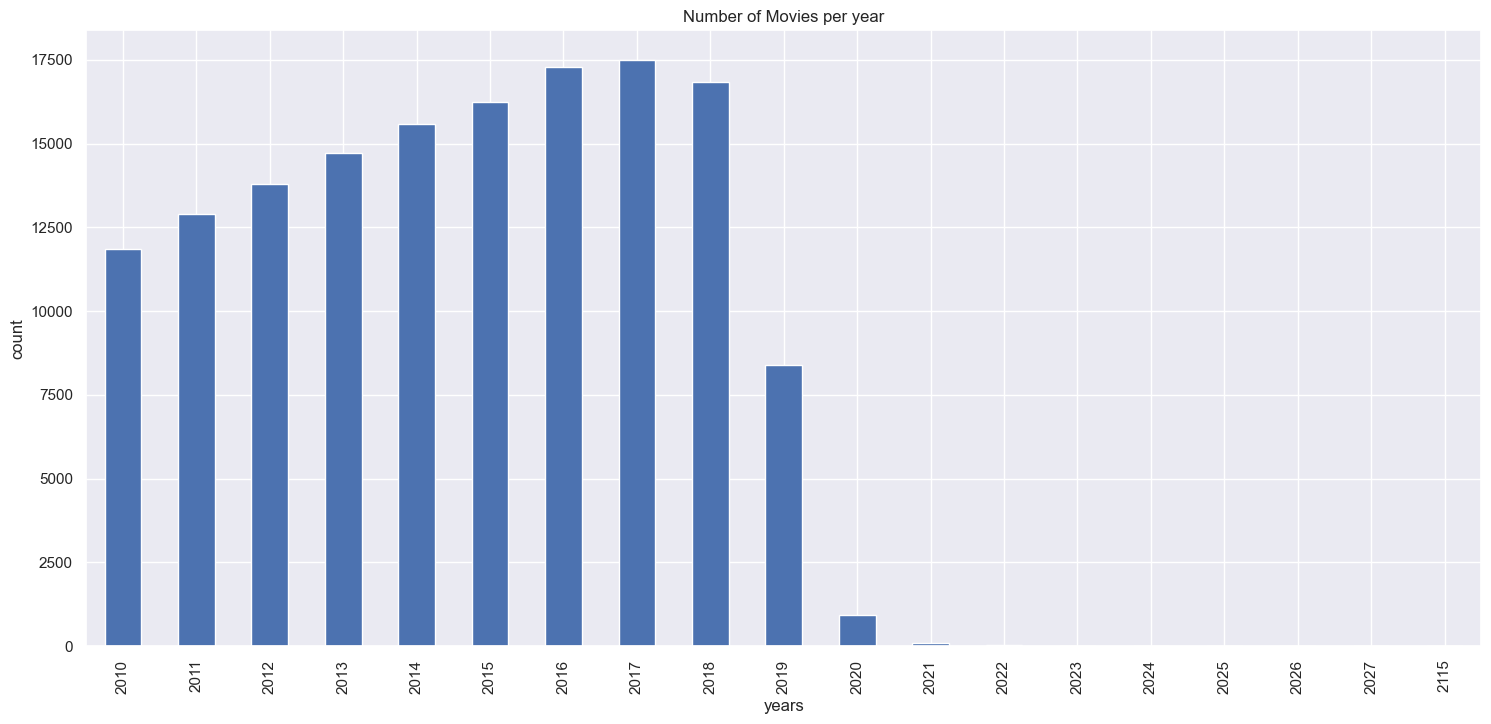

In [67]:
#plot the number of movies that have been created over the years to observe the trend in the industry
q = """
SELECT start_year, Count(*) AS n_movies
FROM df
GROUP BY start_year
HAVING n_movies > 0
;"""

movie_genres_by_year_df = pysqldf(q)


fig, axes = plt.subplots(nrows =1, ncols = 1, figsize = (18,8))
movie_genres_by_year_df.set_index('start_year')['n_movies'].plot(kind='bar',ax=axes)
axes.set_title('Number of Movies per year')
axes.set_xlabel('years')
axes.set_ylabel('count');



In [113]:
#Join the three tables (title basics, movie gross and the title ratings), and assign the new table a variable
#Display the table
q1 = """
SELECT *
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst);
"""

title_basics_join_movie_gross = pysqldf(q1)
title_basics_join_movie_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,18700000.0,2016,7.1,15378
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012,6.1,37886
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,7.3,275300
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,6.5,105116
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,tt9392532,Neighbors,Neighbors,2018,90.0,"Comedy,Drama",Neighbors,Uni.,150200000.0,120500000,2014,7.6,18
3020,tt9447594,The Gambler,The Gambler,2019,121.0,"Action,Sci-Fi,Thriller",The Gambler,Par.,33700000.0,5600000,2014,6.1,10
3021,tt9816988,Gold,Tala,2019,NaN,Drama,Gold,Wein.,7200000.0,7700000,2017,5.2,26
3022,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",Sisters,Uni.,87000000.0,18000000,2015,4.7,14


In [30]:
# Display the top domestic gross, the average rating and the number of votes of the top 10 earning movies
q2 = """
SELECT title, domestic_gross,averagerating, numvotes
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
ORDER BY numvotes DESC
LIMIT 10;
"""

top_10_movies_by_earnings = pysqldf(q2)
top_10_movies_by_earnings

,title,domestic_gross,averagerating,numvotes
0,Inception,292600000.0,8.8,1841066
1,The Dark Knight Rises,448100000.0,8.4,1387769
2,Interstellar,188000000.0,8.6,1299334
3,Django Unchained,162800000.0,8.4,1211405
4,The Wolf of Wall Street,116900000.0,8.2,1035358
5,Shutter Island,128000000.0,8.1,1005960
6,Guardians of the Galaxy,333200000.0,8.1,948394
7,Deadpool,363100000.0,8.0,820847
8,The Hunger Games,408000000.0,7.2,795227
9,Mad Max: Fury Road,153600000.0,8.1,780910


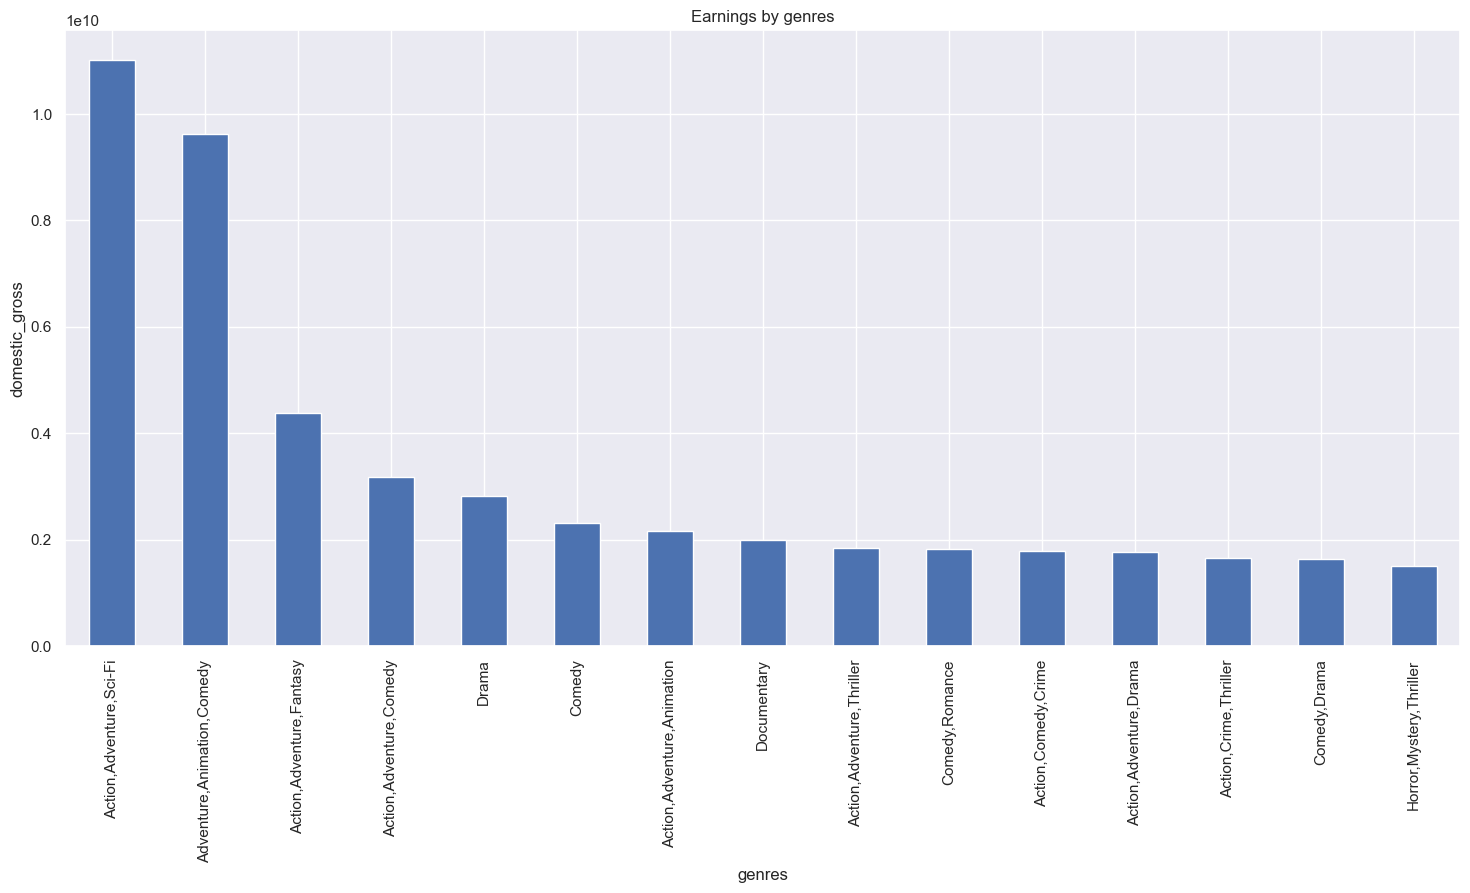

In [68]:
#Plot the genres by the total domestic gross earned and limit the entries to the top 15 items 
q3 = """
SELECT genres, SUM (domestic_gross) AS total_domestic_gross
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
GROUP BY genres
ORDER BY total_domestic_gross DESC
LIMIT 15;
"""

earnings_by_genres_df = pysqldf(q3)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize= (18,8))
earnings_by_genres_df.set_index('genres')['total_domestic_gross'].plot(kind = 'bar', ax = axes)
axes.set_title('Earnings by genres')
axes.set_xlabel('genres')
axes.set_ylabel('domestic_gross');

In [33]:
#import seaborn
import seaborn as sns

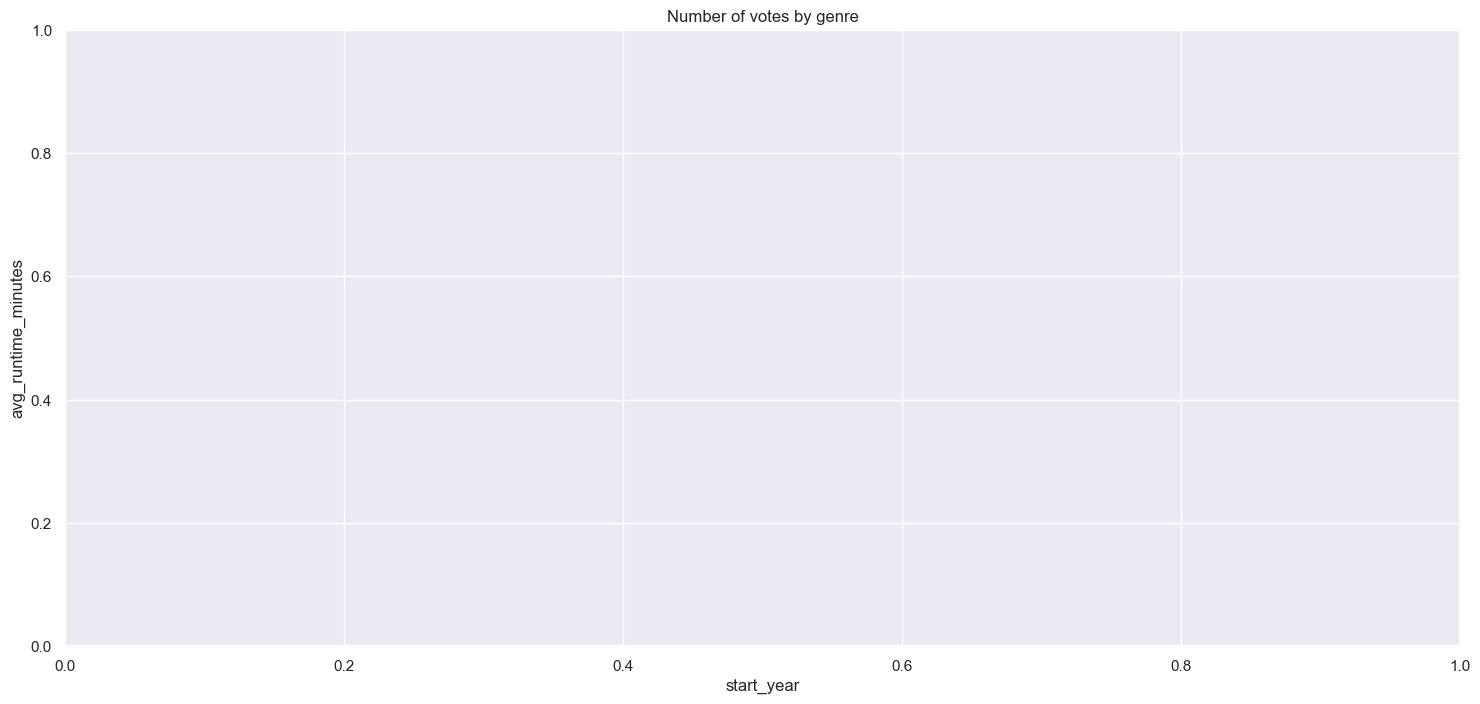

In [62]:
#plot a line graph to view the trends of various genres over the years
q4 = """
SELECT genres, start_year, AVG (runtime_minutes) AS avg_runtime_minutes, AVG(averagerating) AS avg_rating
FROM df
INNER JOIN df1
ON df.primary_title = df1.title
INNER JOIN df2
USING (tconst)
GROUP BY genres
HAVING avg_runtime_minutes BETWEEN 100 AND 120
ORDER BY avg_runtime_minutes DESC
;
"""

avg_runtime_minutes_genres_df = pysqldf(q4)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize= (18,8))
avg_runtime_minutes_genres_df.set_index('start_year')['avg_runtime_minutes'].plot
axes.set_title('Number of votes by genre')
axes.set_xlabel('start_year')
axes.set_ylabel('avg_runtime_minutes');


<Axes: xlabel='start_year', ylabel='avg_runtime_minutes'>

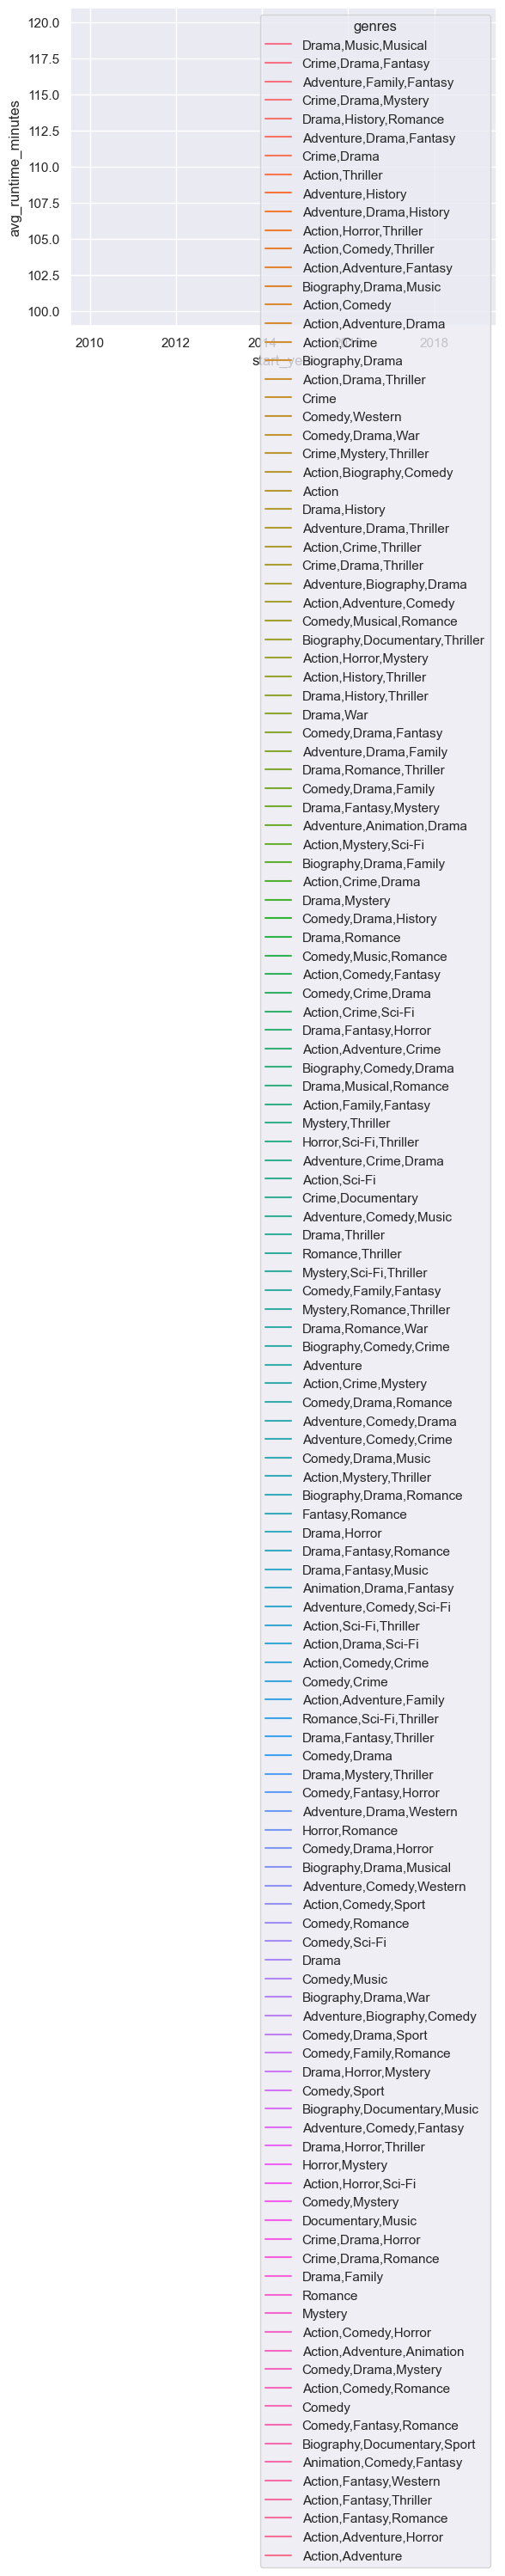

In [53]:
#Since the above failed I tried to use seaborn to plot line graph to show the trends of genres over the years using
#the variable genres_by_years by number of votes
sns.set_theme(style = 'darkgrid')
sns.lineplot(x='start_year', y = 'avg_runtime_minutes', hue = 'genres', data = genres_by_years_numvotes_df)